# Project : No-show-appointment data analysis
## Table of contents
* Introduction
* Data Wrangling
* Exploratory data analysis
* Conclusion

# Introduction

> This project describes No-show-appointment dataset which collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. I would be asking the following questions from this dataset;
>
> 1. Is age a factor to predict whether or not patients show up for their appointment?
> 2. Do women or men take their appointments more seriously?
> 3. Do beneficiaries of scholarships or those who receive sms updates show up more for their appointments?
> 4. Do patients with lower waiting periods(Appointment time - Scheduled time) show up more than those with longer waiting perods? 
> 5. Whether patients with a particular disease condition show up more for their appointments

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

## Data Wrangling

### Loading data

In [2]:
df = pd.read_csv('no-show-appointments.csv')

### General properties of the data

In [3]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.duplicated().sum().sum()

0

In [9]:
df.isnull().sum().any()

False

>From the above codes above, the following changes would be involved in the data cleaning process;

>1. Change all column names to lower case and and replace " " and "-" to "_"
>2. Rename columns hipertension to hypertension and handcap to handicap
>3. Change scheduled day and appointment day types from string to time format
>4. Create a new column "waiting days" from "appointment id" and "scheduled id" for axploratory analysis
>5. Create a new column "age bracket" for ease of exploratory analysis

## Data Cleaning

### 1. Change all column names to lower case and and replace " " and "-" to "_"

In [10]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_").replace('-','_'), inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 2. Rename columns hipertension to hypertension and handcap to handicap

In [11]:
df.rename(columns = {'hipertension' : 'hypertension'}, inplace = True)
df.rename(columns = {'handcap' : 'handicap'}, inplace = True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 3. Change scheduled day and appointment day types from string to time format

In [12]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df.dtypes

patientid                     float64
appointmentid                   int64
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hypertension                    int64
diabetes                        int64
alcoholism                      int64
handicap                        int64
sms_received                    int64
no_show                        object
dtype: object

### 4. Create a new column "waiting days" from "appointment id" and "scheduled id" for axploratory analysis

In [13]:
df['waitingdays'] = df['appointmentday'] - df['scheduledday']
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waitingdays
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37


>**From the code above, there are negative values in the waiting days column which would not be good for analysis therefore need to be dropped.**

In [14]:
df.drop(df[(df['waitingdays'] < pd.to_timedelta(0))].index, inplace = True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waitingdays
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1 days 15:23:09
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:54:48
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:20:02
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1 days 11:11:35
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,1 days 09:01:49


>**To aid our analysis, the waiting period in days would be better used.**

In [15]:
df['waitingdays'] = df['waitingdays'].dt.days
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waitingdays
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,1


### 5. Create a new column "age bracket" for ease of exploratory analysis
> 0-14 : Child, 15-24 : youth, 25-64 : adult, >64 : elderly

In [16]:
df['age_bracket'] = pd.cut(x = df['age'], bins = [0, 14, 24, 64,np.inf], labels = ['child', 'youth', 'adult', 'elderly'])
df.head(20)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waitingdays,age_bracket
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1,elderly
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,youth
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,adult
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1,youth
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,1,adult
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,2,adult
12,5.666548e+14,5634718,F,2016-04-28 11:33:51+00:00,2016-04-29 00:00:00+00:00,22,NOVA PALESTINA,1,0,0,0,0,0,No,0,youth
13,9.113946e+14,5636249,M,2016-04-28 14:52:07+00:00,2016-04-29 00:00:00+00:00,28,NOVA PALESTINA,0,0,0,0,0,0,No,0,adult
14,9.988472e+13,5633951,F,2016-04-28 10:06:24+00:00,2016-04-29 00:00:00+00:00,54,NOVA PALESTINA,0,0,0,0,0,0,No,0,adult
15,9.994839e+10,5620206,F,2016-04-26 08:47:27+00:00,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,No,2,youth


## Exploratory data analysis

### Research Question 1 (Is age a factor to predict whether or not patients show up for their appointment?)
> First, group by age bracket 

In [17]:
age_df = df.groupby(['age_bracket', 'no_show'], as_index = False)['patientid'].count()
age_df

,age_bracket,no_show,patientid
0,child,No,7851
1,child,Yes,3739
2,youth,No,5587
3,youth,Yes,3167
4,adult,No,28402
5,adult,Yes,10908
6,elderly,No,8054
7,elderly,Yes,2120


> Create a stacked bar chart using seaborn

Text(0, 0.5, 'Number of patients')

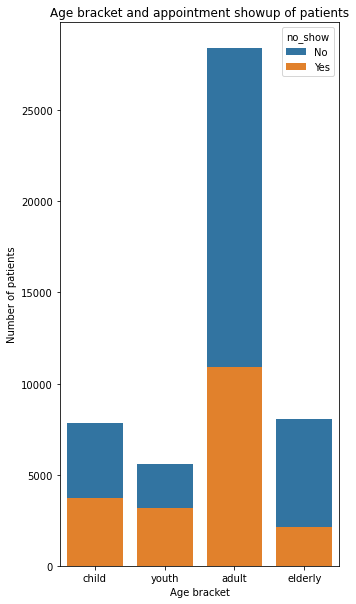

In [18]:
plt.figure(figsize=(5,10))
sns.barplot(x = 'age_bracket', y = 'patientid', hue = 'no_show', data = age_df, dodge = False)
plt.title('Age bracket and appointment showup of patients')
plt.xlabel('Age bracket')
plt.ylabel('Number of patients')

>**There is no significant difference betwwen those that attended and those that missed their appointment within each age group.**

### Research Question 2 (Do women or men take their appointments more seriously?)

> Group by gender

In [19]:
sex_df = df.groupby(['gender', 'no_show'], as_index = False)['patientid'].count()
sex_df

,gender,no_show,patientid
0,F,No,34396
1,F,Yes,13674
2,M,No,17041
3,M,Yes,6848


> Create a stacked bar chart using seaborn

Text(0, 0.5, 'Number of patients')

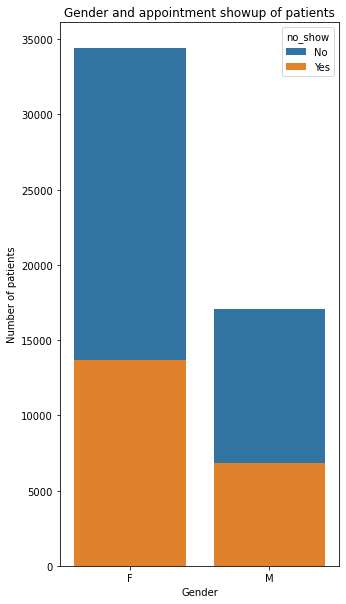

In [20]:
plt.figure(figsize=(5,10))
sns.barplot(x = 'gender', y = 'patientid', hue = 'no_show', data = sex_df, dodge = False)
plt.title('Gender and appointment showup of patients')
plt.xlabel('Gender')
plt.ylabel('Number of patients')

>**More than 50% of patients in each gender showed up for their appointments**

### Research Question 3(Do beneficiaries of scholarships or those who receive sms updates show up more for their appointments?)

In [21]:
scholar_sms_df = df.groupby('no_show', as_index = False)['scholarship', 'sms_received'].sum()
scholar_sms_df

C:\Users\USER\AppData\Local\Temp\ipykernel_15912\1726890957.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  scholar_sms_df = df.groupby('no_show', as_index = False)['scholarship', 'sms_received'].sum()


,no_show,scholarship,sms_received
0,No,4338,25698
1,Yes,2333,9784


In [22]:
scholar_sms_df = scholar_sms_df.T.reset_index()
scholar_sms_df.columns = ['index', 'No', 'Yes']
scholar_sms_df

,index,No,Yes
0,no_show,No,Yes
1,scholarship,4338,2333
2,sms_received,25698,9784


In [23]:
scholar_sms_df.drop(index = 0, inplace = True)
scholar_sms_df

,index,No,Yes
1,scholarship,4338,2333
2,sms_received,25698,9784


> Create a horizontal bar chart

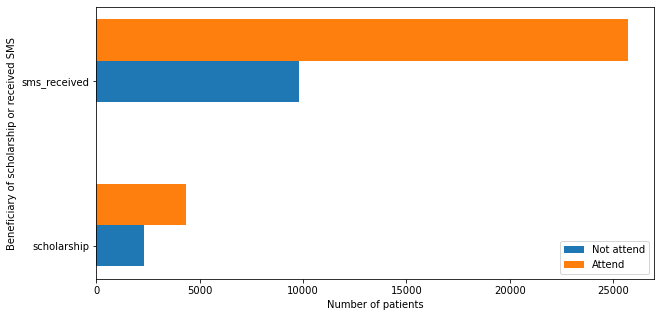

In [24]:
# set width of bar
width = 0.25
f, ax = plt.subplots(figsize =(10, 5))

#set label
labels = scholar_sms_df['index'].values

# set height of bar
yyes = scholar_sms_df['Yes'].values
yno = scholar_sms_df['No'].values
 
# Set position of bar on X axis
xyes = np.arange(len(labels))
xno = xyes + width
 
# Make the plot
yes = ax.barh(xyes, yyes, width, label ='Not attend')
no = ax.barh(xno, yno, width, label ='Attend')

# Adding Xticks
plt.xlabel('Number of patients')
plt.ylabel('Beneficiary of scholarship or received SMS')
ax.set_yticks(xyes)
ax.set_yticklabels(labels)
ax.legend(loc = 'best')

>**Those who received SMS reminders showed up more than those that did not**
>
>**No significant relationship between those that received scholarships and those who did not in showing up for their appointments**

### Research Question 4(Do patients with lower waiting periods(Appointment time - Scheduled time) show up more than those with longer waiting perods?)

> Group by waiting days

In [25]:
waiting_df = df.groupby(['waitingdays', 'no_show'], as_index = False)['patientid'].count()
waiting_df

,waitingdays,no_show,patientid
0,0,No,4100
1,0,Yes,1113
2,1,No,5123
3,1,Yes,1602
4,2,No,2093
...,...,...,...
228,168,Yes,1
229,175,No,10
230,175,Yes,6
231,178,No,8


> Find max value of waiting days

In [26]:
df['waitingdays'].max()

178

> Group waiting days as : <50 as low waiting periods, >50 to 125 as medium waiting periods, >125 as long waiting periods

>Create a scatter plot

Text(0, 0.5, 'Number of patients')

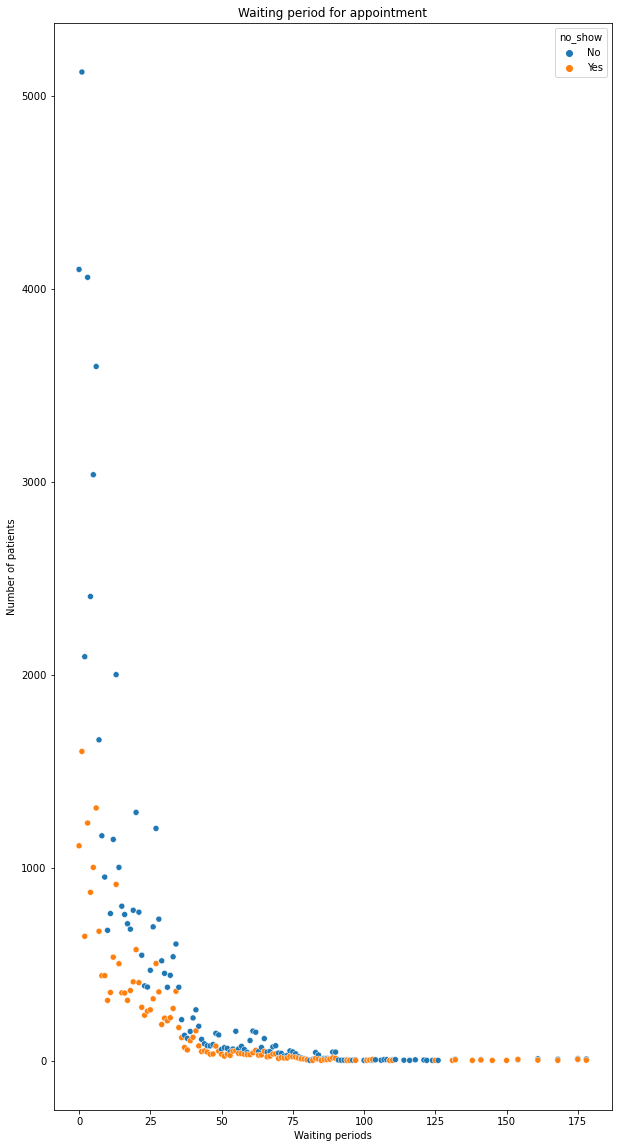

In [27]:
plt.figure(figsize=(10,20))
sns.scatterplot(x = 'waitingdays', y = 'patientid', hue = 'no_show', data = waiting_df )
plt.title('Waiting period for appointment')
plt.xlabel('Waiting periods')
plt.ylabel('Number of patients')

>**The number of patients who attended with long waiting periods(>125) is few**

>**On the average waiting periods(50-125), the number of patients who showed up are almost similar**

>**in low waiting periods(<25), attendance increases with a large number of patients**

### Research Question 5(Whether patients with a particular disease condition show up more for their appointments)

In [29]:
condition_df = df.groupby('no_show', as_index = False)['hypertension', 'diabetes', 'alcoholism', 'handicap'].sum()
condition_df

C:\Users\USER\AppData\Local\Temp\ipykernel_15912\2026735108.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  condition_df = df.groupby('no_show', as_index = False)['hypertension', 'diabetes', 'alcoholism', 'handicap'].sum()


,no_show,hypertension,diabetes,alcoholism,handicap
0,No,11496,4035,1201,1066
1,Yes,3536,1342,621,375


In [30]:
condition_df = condition_df.T.reset_index()
condition_df.columns = ['index', 'No', 'Yes']
condition_df

,index,No,Yes
0,no_show,No,Yes
1,hypertension,11496,3536
2,diabetes,4035,1342
3,alcoholism,1201,621
4,handicap,1066,375


In [31]:
condition_df.drop(index = 0, inplace = True)
condition_df

,index,No,Yes
1,hypertension,11496,3536
2,diabetes,4035,1342
3,alcoholism,1201,621
4,handicap,1066,375


>Create a horizontal bar chart

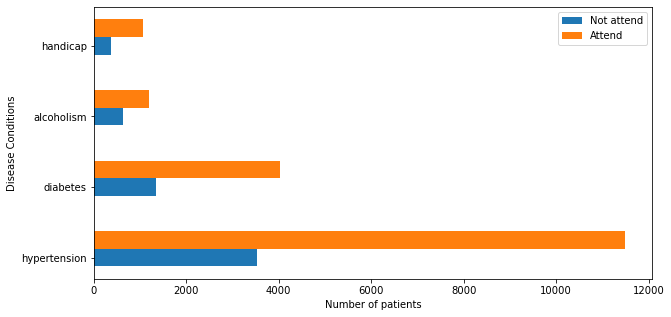

In [32]:
# set width of bar
width = 0.25
f, ax = plt.subplots(figsize =(10, 5))

#set label
labels = condition_df['index'].values

# set height of bar
yyes = condition_df['Yes'].values
yno = condition_df['No'].values
 
# Set position of bar on X axis
xyes = np.arange(len(labels))
xno = xyes + width
 
# Make the plot
yes = ax.barh(xyes, yyes, width, label ='Not attend')
no = ax.barh(xno, yno, width, label ='Attend')

# Adding Xticks
plt.xlabel('Number of patients')
plt.ylabel('Disease Conditions')
ax.set_yticks(xyes)
ax.set_yticklabels(labels)
ax.legend(loc = 'best')

>**There are no relation between these conditions, the ratio of those that attend to those that are absent is high**

## Conclusion

>**In conclusion, there were no significant relationship between no show and most variables that were tested. However, long period of waiting time is associated with a low number of patients who showed up. Also, the patients who received sms messages also showed up more than those who didnt.**